The purpose of this notebook is to evaluate GPDs $G_q(x,\eta,t)$ as well as their conformal moments $\mathbb{G}_q(n,\eta,t)$, where, for a generic GPD, we have its conformal moment expansion
\begin{equation}
G_q(x,\eta,t)=\sum_{n=0}^\infty (-1)^{n}p_n(x,\eta)\mathbb{F}_q(n,\eta,t),\qquad G_g(x,\eta,t)=\sum_{n=1}^\infty (-1)^{n-1}\, {^g\!p}_n(x,\eta) \mathbb{G}_g(n,\eta,t),
\end{equation}
where $G=H,E,\widetilde{H},\widetilde{E},H^T,E^T,\widetilde{H}^T,\widetilde{E}^T$.

To this end, we import the MSTW PDF parametrization of PDFs. The conformal moments are obtained by Reggeized $x$ integrals over PDFs at some input scale $\mu_0=1$ GeV and evolved using the pertinent RGEs. THe GPDs are reconstructed using the expansion in conformal partial waves and pertinent Mellin-Barnes integrals to resum their expansion in conformal moments.

In [ ]:
# Import necessary libraries and set display options
import numpy as np
# import mpmath as mp
# import matplotlib.pyplot as plt
# from scipy.integrate import quad, trapezoid
# from joblib import Parallel, delayed
# from scipy.special import gamma, digamma

# import time
# import re
# import os

# from mstw_pdf import (
#     plot_uv_minus_dv_pdf, 
#     plot_uv_plus_dv_plus_S_pdf,
#     plot_gluon_pdf
# )

# from aac_pdf import(
#     plot_polarized_uv_minus_dv_pdf,
#     plot_polarized_uv_plus_dv_plus_S_pdf,
#     plot_polarized_gluon_pdf
#     )

from stringy_gpds import (
    plot_moment, plot_gpds,plot_gpd_data,
    plot_moments_on_grid, mellin_barnes_gpd,
    evolve_conformal_moment,
    evolve_singlet_D,gluon_helicity,
    quark_helicity, spin_orbit_corelation,
    orbital_angular_momentum, quark_gluon_spin,
    plot_fourier_transform_singlet_helicity,
    plot_fourier_transform_quark_helicity,
    plot_fourier_transform_quark_spin_orbit_correlation,
    plot_fourier_transform_singlet_spin_orbit_correlation,
    fourier_transform_spin_orbit_correlation,
    plot_fourier_transform_quark_orbital_angular_momentum,
    plot_fourier_transform_transverse_moments,
    plot_spin_orbit_correlation
)
# Set display options
np.set_printoptions(linewidth=200)

Plots of conformal moments $\mathbb{G}(n,\eta,tb_\perp)$ in momentum space

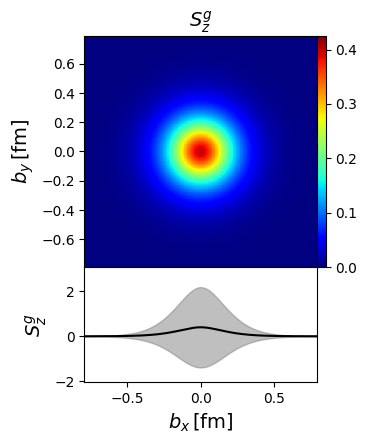

In [2]:
plot_fourier_transform_singlet_helicity(0,2,particle="gluon",read_from_file=True,write_to_file=False,b_max=4, n_b = 50, vmin=0,vmax=.425)

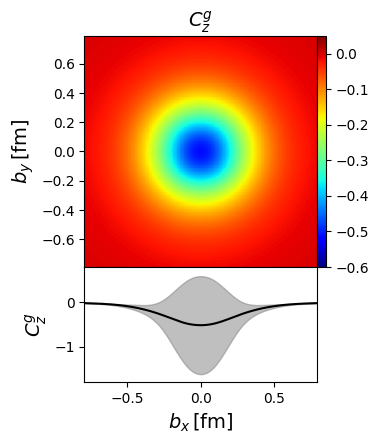

In [3]:
plot_fourier_transform_singlet_spin_orbit_correlation(0,2,particle="gluon",read_from_file=True,write_to_file=False,b_max=4, n_b = 50,Delta_max=8,vmin = -.6, vmax = 0.05 ,ymin=-1.8, ymax = .8)

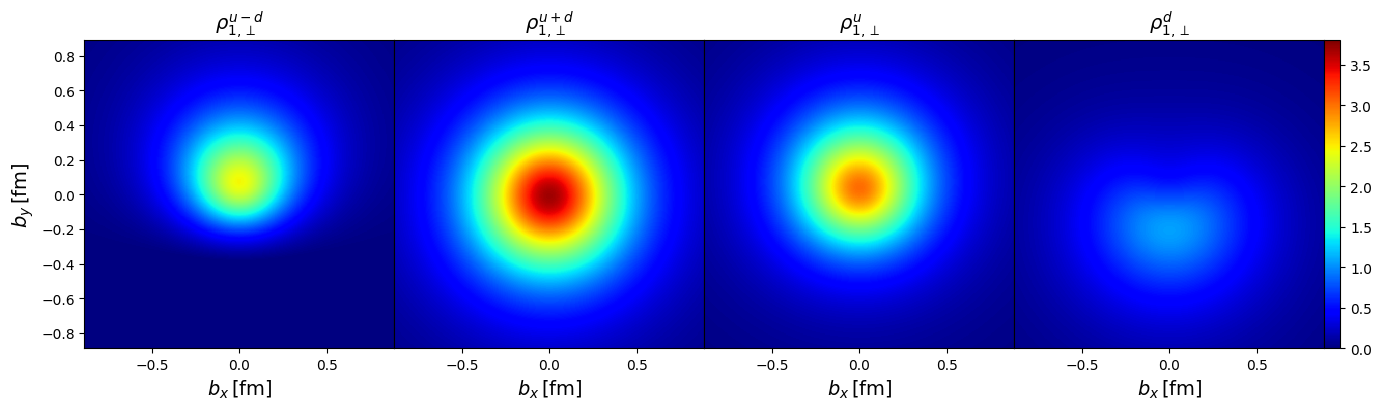

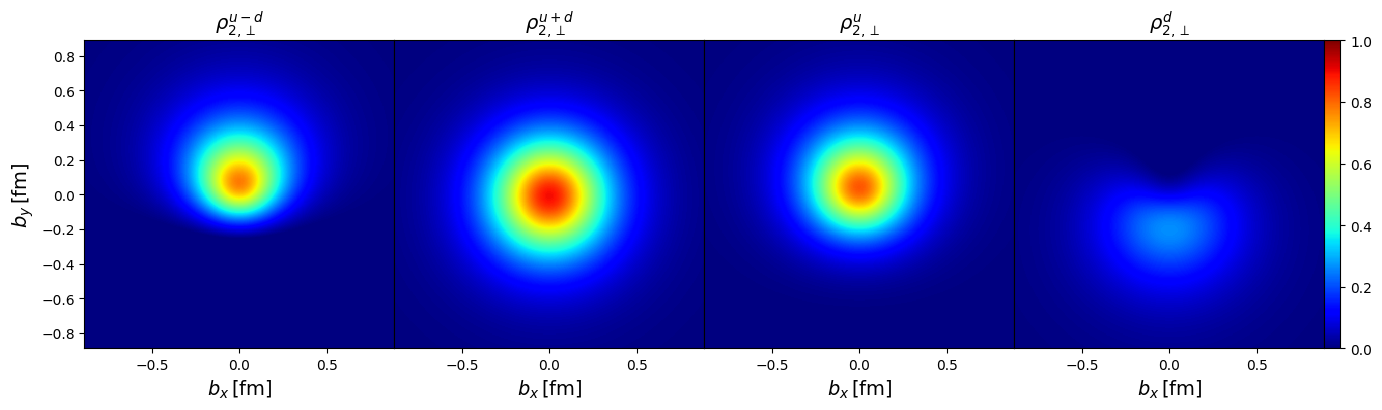

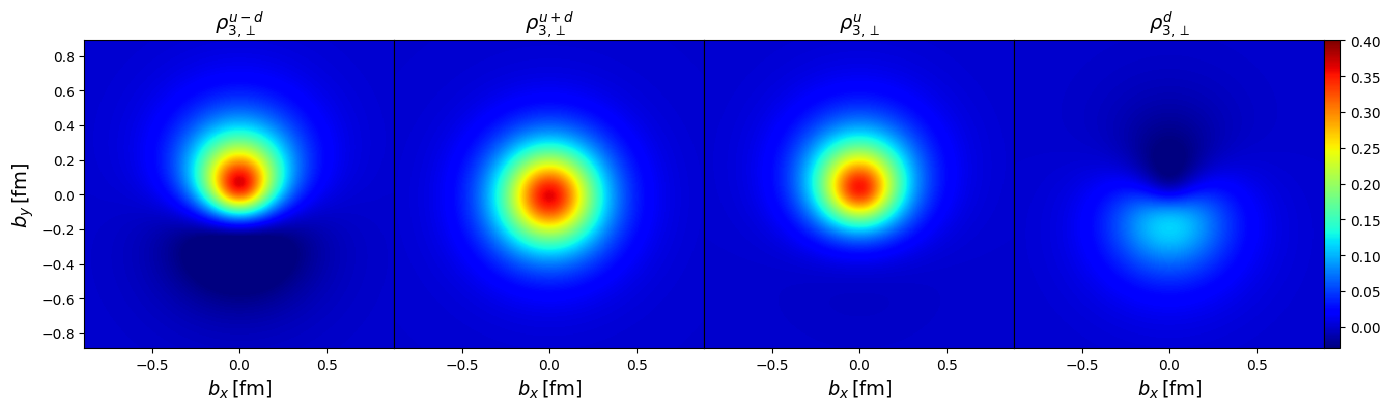

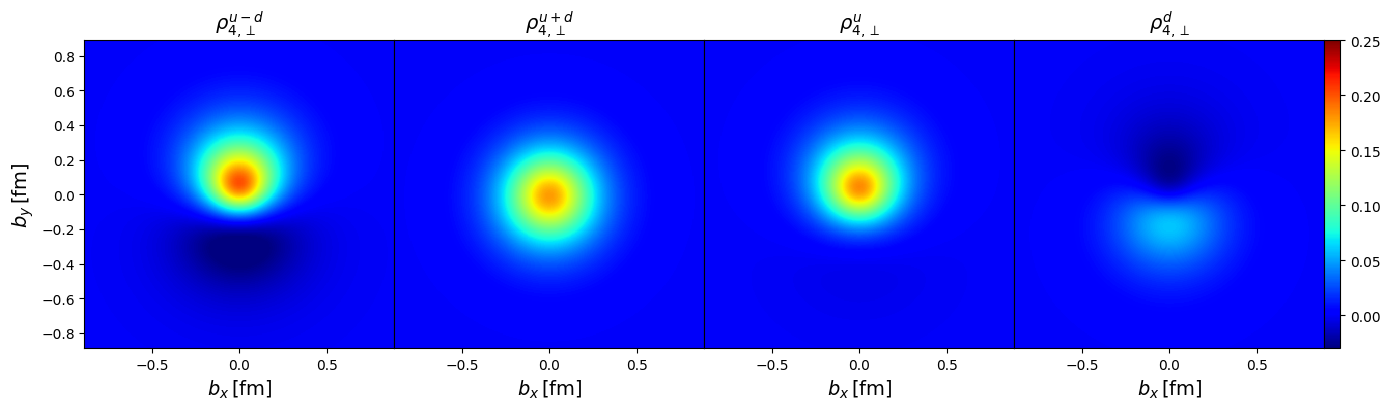

In [2]:
plot_fourier_transform_transverse_moments(1,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=0, vmax=3.8)
plot_fourier_transform_transverse_moments(2,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=0, vmax=1)
plot_fourier_transform_transverse_moments(3,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=-.03, vmax=.4)
plot_fourier_transform_transverse_moments(4,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=-.03, vmax=.25)

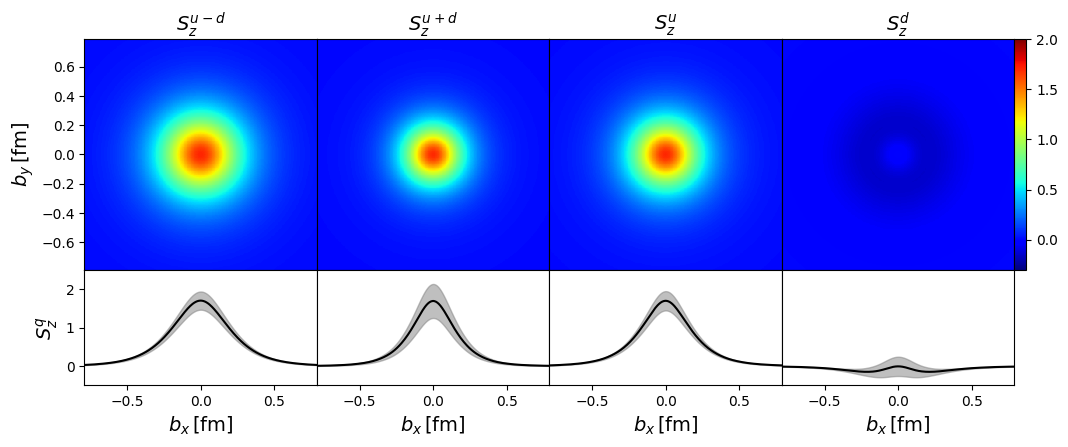

In [4]:
plot_fourier_transform_quark_helicity(0,2,read_from_file=True,write_to_file=False,b_max=4, n_b = 100,moment_type="all",vmin = -0.3, vmax = 2)

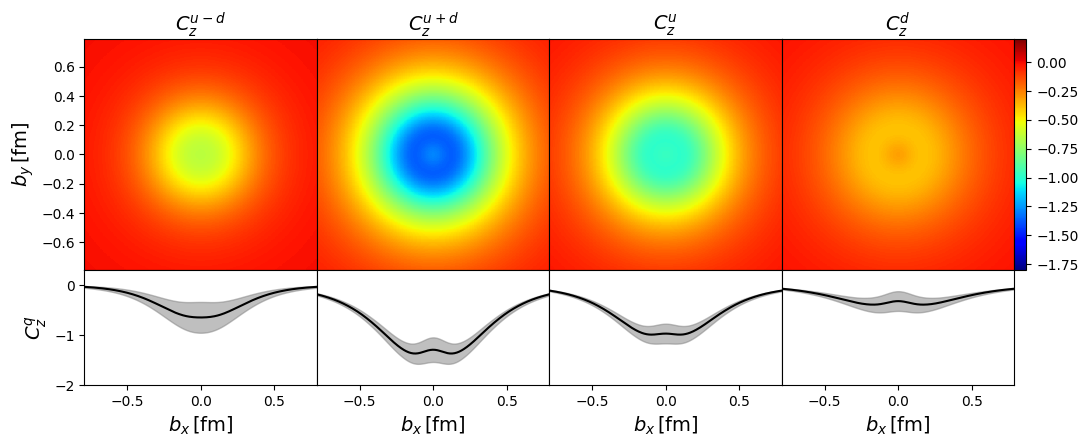

In [5]:
plot_fourier_transform_quark_spin_orbit_correlation(0,2,read_from_file=True,write_to_file=False,b_max=4, n_b = 100,moment_type="all",Delta_max=8,vmin = -1.8, vmax = .2,ymin=-2, ymax = .3)

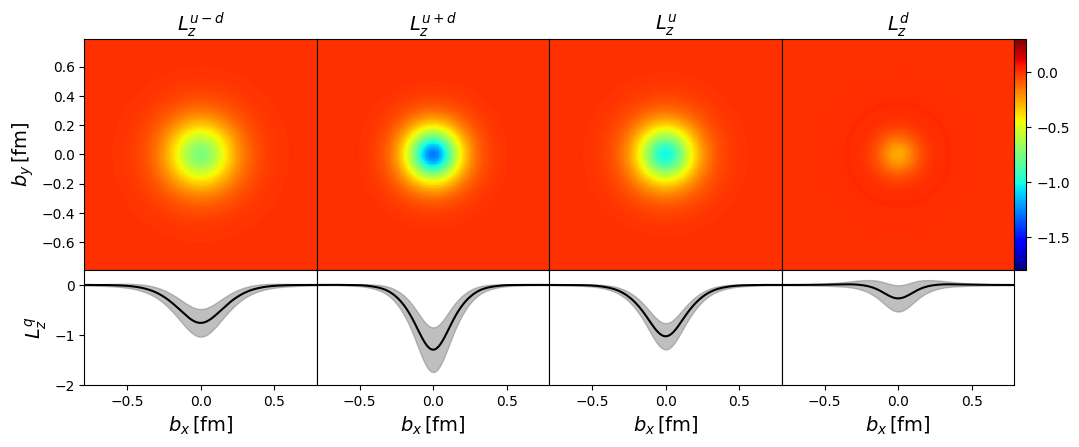

In [6]:
plot_fourier_transform_quark_orbital_angular_momentum(0,2,read_from_file=True,write_to_file=False,b_max=4, n_b = 100,moment_type="all",Delta_max=7,vmin = -1.8, vmax = .3,ymin=-2)

In [8]:
np.sqrt(0.118**2+0.061**2)/2

np.float64(0.06641724173736817)

In [14]:
l_u_minus_d, l_u_minus_d_plus ,l_u_minus_d_minus = orbital_angular_momentum(0,2)
l_u_plus_d, l_u_plus_d_plus ,l_u_plus_d_minus = orbital_angular_momentum(0,2,moment_type="NonSingletIsoscalar")
l_s, _ ,_ = orbital_angular_momentum(0,2,moment_type="Singlet")
l_u = (l_u_minus_d + l_u_plus_d)/2
l_d = (l_u_plus_d - l_u_minus_d)/2
# print(l_u_minus_d_plus,l_u_minus_d_minus)
# print(l_u_plus_d_plus,l_u_plus_d_minus)
print(l_u_plus_d,l_u_minus_d)
print(l_u,l_d,l_s)
# print(l_u+l_d+l_s)

-0.04106153353561215 -0.219103215838246
-0.13008237468692907 0.08902084115131692 0.0152597925474197


In [4]:
s_u_minus_d, s_u_minus_d_plus, s_u_minus_d_minus = quark_helicity(0,2,moment_type="NonSingletIsovector")
s_u_plus_d, s_u_plus_d_plus, s_u_plus_d_minus = quark_helicity(0,2,moment_type="NonSingletIsoscalar")
s_s, s_s_plus, s_s_minus= quark_helicity(0,2,moment_type="Singlet")
s_g, s_g_plus, s_g_minus = gluon_helicity(0,2)
s_u = (s_u_plus_d+s_u_minus_d)/2
s_u_plus = np.sqrt(s_u_minus_d_plus**2+s_u_plus_d_plus**2)/2
s_u_minus = np.sqrt(s_u_minus_d_minus**2+s_u_plus_d_minus**2)/2
s_d = (s_u_plus_d-s_u_minus_d)/2
print(s_u_minus_d,s_u_minus_d_minus,s_u_minus_d_plus)
print(s_u_plus_d,s_u_plus_d_plus,s_u_plus_d_minus)
print(s_u,s_u_plus,s_u_minus)
print(s_d,s_u_plus,s_u_minus)
# print(s_s,s_s_plus,s_s_minus)
# print(s_g,s_g_plus,s_g_minus)
# print(s_u+s_d+s_s)
# print(s_g)

0.6399707831823318 0.08115649217992948 0.08115649217992948
0.2060500053406073 0.05619504848825929 0.05619504848825929
0.4230103942614696 0.049356508429863555 0.049356508429863555
-0.21696038892086225 0.049356508429863555 0.049356508429863555


In [5]:
c_u_minus_d, c_u_minus_d_plus, c_u_minus_d_minus = spin_orbit_corelation(0,2,moment_type="NonSingletIsovector")
c_u_plus_d, c_u_plus_d_plus, c_u_plus_d_minus = spin_orbit_corelation(0,2,moment_type="NonSingletIsoscalar")
c_u = (c_u_plus_d+c_u_minus_d)/2
c_u_plus = np.sqrt(c_u_minus_d_plus**2+c_u_plus_d_plus**2)/2
c_u_minus = np.sqrt(c_u_minus_d_minus**2+c_u_plus_d_minus**2)/2
c_d = (c_u_plus_d-c_u_minus_d)/2
print(c_u_minus_d,c_u_minus_d_minus,c_u_minus_d_plus)
print(c_u_plus_d,c_u_plus_d_plus,c_u_plus_d_minus)
print(c_u,c_u_plus,c_u_minus)
print(c_d,c_u_plus,c_u_minus)

-0.39844253802641905 0.17950598244725235 0.17043054856399925
-1.4625505084866472 0.17010833004615744 0.1792000831518223
-0.9304965232565332 0.12039872905778339 0.12682179183402717
-0.532053985230114 0.12039872905778339 0.12682179183402717


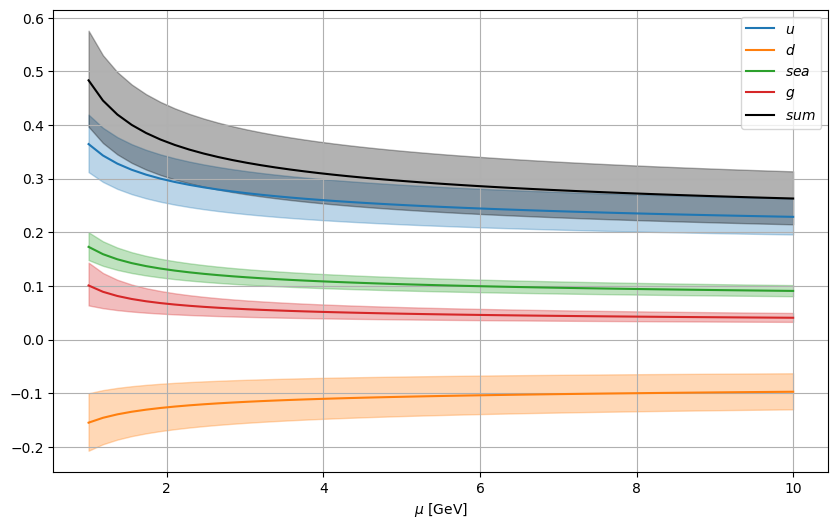

In [5]:
import matplotlib.pyplot as plt

def plot_quark_gluon_spin():
    def mpf_tuple_to_float(tup):
        """Convert a tuple of mpf arrays/lists to numpy float64 arrays."""
        return tuple(np.array([float(x) for x in arr], dtype=np.float64) for arr in tup)

    def quark_gluon_spin_float(*args, **kwargs):
        """Wrapper around quark_gluon_spin that converts all outputs to np.float64 arrays."""
        return mpf_tuple_to_float(quark_gluon_spin(*args, **kwargs))
    mu = np.linspace(1, 10, 50)

    # Retrieve data and errors, converted to float arrays immediately
    j_u_minus_d, j_u_minus_d_plus, j_u_minus_d_minus = quark_gluon_spin_float(0, mu)
    j_u_plus_d, j_u_plus_d_plus, j_u_plus_d_minus = quark_gluon_spin_float(0, mu, moment_type="NonSingletIsoscalar")
    j_s, j_s_plus, j_s_minus = quark_gluon_spin_float(0, mu, moment_type="Singlet")
    j_g, j_g_plus, j_g_minus = quark_gluon_spin_float(0, mu, particle="gluon", moment_type="Singlet")

    # Compute individual quark spins
    j_u = (j_u_minus_d + j_u_plus_d) / 2
    j_d = (j_u_plus_d - j_u_minus_d) / 2

    # Compute errors
    j_u_plus = np.sqrt(j_u_minus_d_plus**2 + j_u_plus_d_plus**2) / 2
    j_u_minus = np.sqrt(j_u_minus_d_minus**2 + j_u_plus_d_minus**2) / 2

    j_total = j_u + j_d + j_s + j_g
    error_plus = np.sqrt(2 * j_u_plus**2 + j_s_plus**2 + j_g_plus**2)
    error_minus = np.sqrt(2 * j_u_minus**2 + j_s_minus**2 + j_g_minus**2)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Helper function for plotting with error bands
    def plot_with_errorband(mu, value, err_plus, err_minus, label, color):
        plt.plot(mu, value, label=label, color=color)
        plt.fill_between(mu, value - err_minus, value + err_plus, color=color, alpha=0.3)

    plot_with_errorband(mu, j_u, j_u_plus, j_u_minus, r'$u$', 'tab:blue')
    plot_with_errorband(mu, j_d, j_u_plus, j_u_minus, r'$d$', 'tab:orange')
    plot_with_errorband(mu, j_s, j_s_plus, j_s_minus, r'$sea$', 'tab:green')
    plot_with_errorband(mu, j_g, j_g_plus, j_g_minus, r'$g$', 'tab:red')
    plot_with_errorband(mu, j_total, error_plus, error_minus, r'$sum$', 'k')

    plt.xlabel(r'$\mu$ [GeV]')
    #plt.ylabel(r'Angular Momentum Contribution')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_quark_gluon_spin()


In [ ]:
def total_spin(t,mu):
    j_u_minus_d, j_u_minus_d_plus ,j_u_minus_d_minus= quark_gluon_spin(t,mu)
    j_u_plus_d, j_u_plus_d_plus , j_u_plus_d_minus = quark_gluon_spin(t,mu,moment_type="NonSingletIsoscalar")
    j_s, j_s_plus, j_s_minus = quark_gluon_spin(t,mu,moment_type="Singlet")
    j_g, j_g_plus ,j_g_minus = quark_gluon_spin(t,mu,particle="gluon",moment_type="Singlet")

    j_u = (j_u_minus_d+j_u_plus_d)/2
    j_d = (j_u_plus_d-j_u_minus_d)/2
    j_u_plus = np.sqrt((j_u_minus_d_plus)**2+(j_u_plus_d_plus)**2)/2
    j_u_minus = np.sqrt((j_u_minus_d_minus)**2+(j_u_plus_d_minus)**2)/2
    error_plus = np.sqrt(2*j_u_plus**2+j_s_plus**2+j_g_plus**2)
    error_minus= np.sqrt(2*j_u_minus**2+j_s_minus**2+j_g_minus**2)
    print(j_u + j_d + j_s + j_g, f'({error_plus})({error_minus})')

0.368205268227426 (0.0691794005656669)(0.0679402889812622)


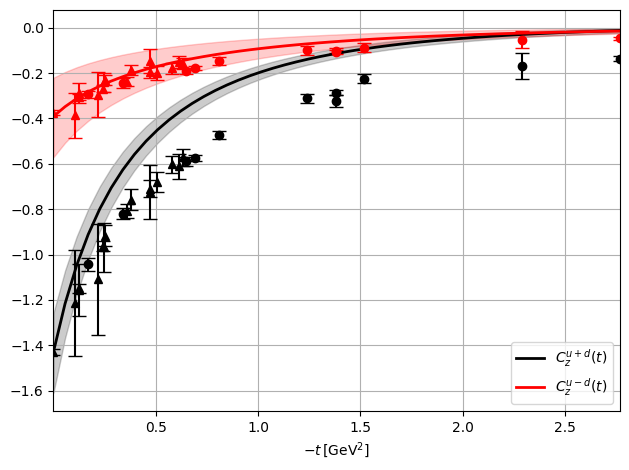

In [2]:
plot_spin_orbit_correlation()

Plots of conformal moments $\mathbb{G}(n,\eta,t)$ in momentum space

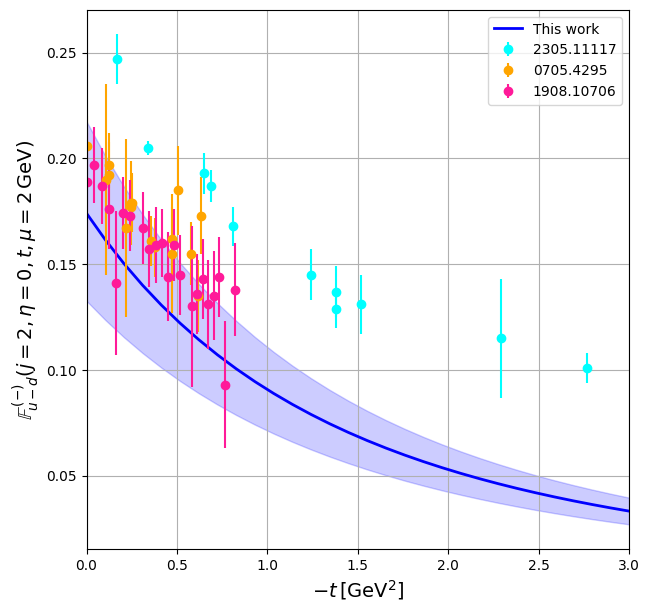

In [3]:
#NonSingletIsovector
y_label = "$\\mathbb{{F}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsovector"
moment_label = "A"
plot_moment(2,0,y_label,2,3,3,"quark",moment_type, moment_label,30)

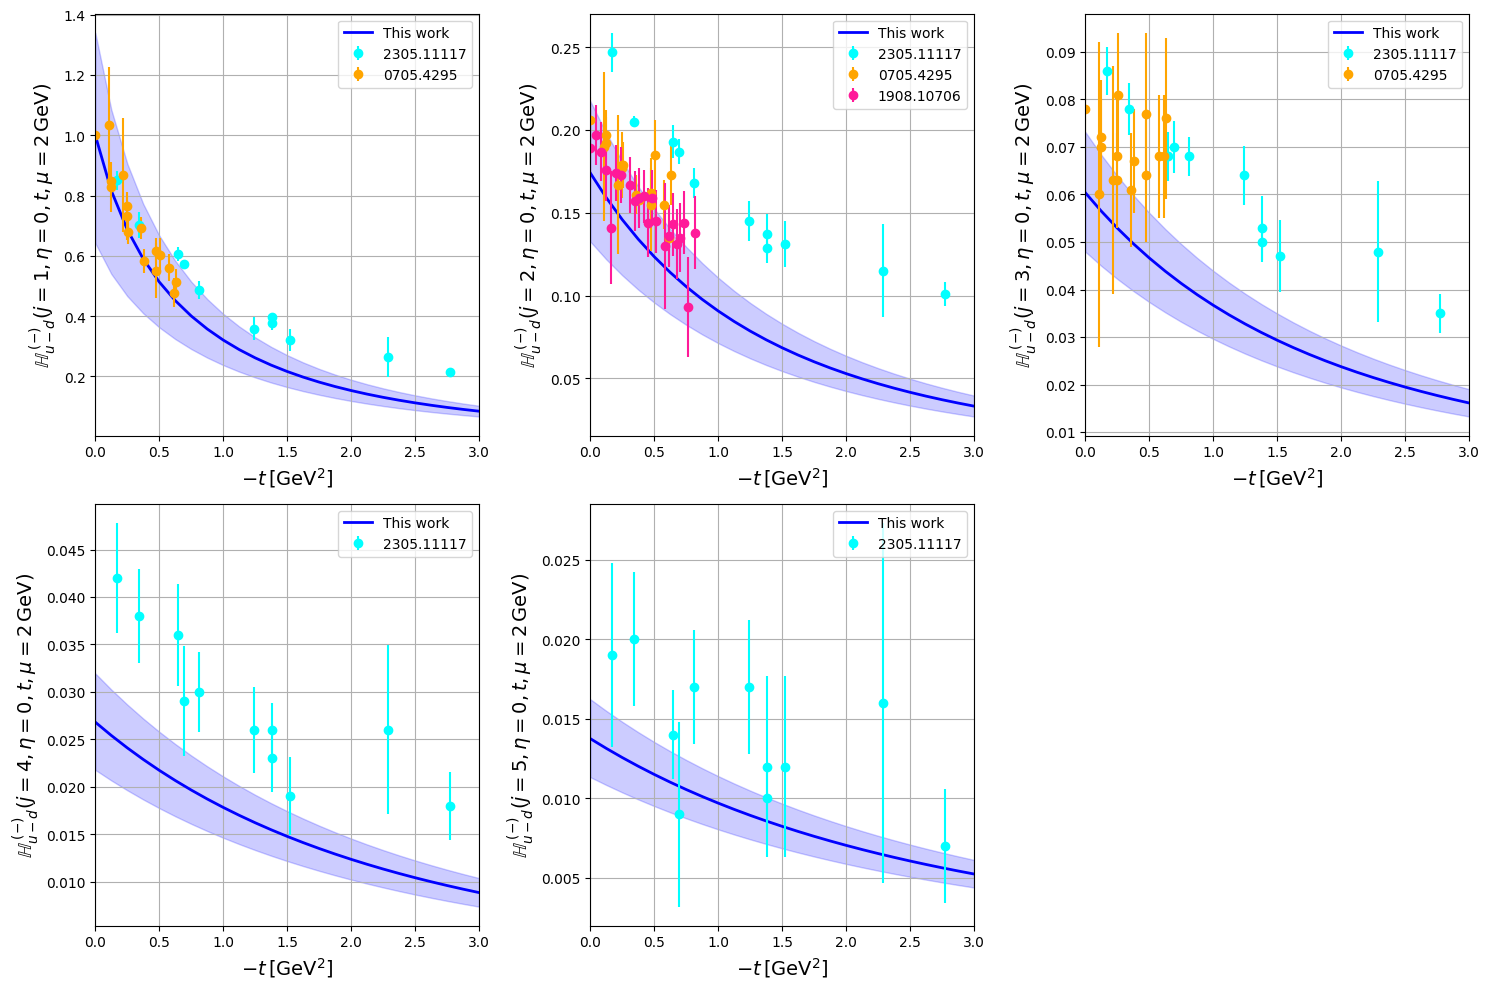

In [3]:
#NonSingletIsovector
y_label = "$\\mathbb{{H}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsovector"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,"quark",moment_type, moment_label,25)

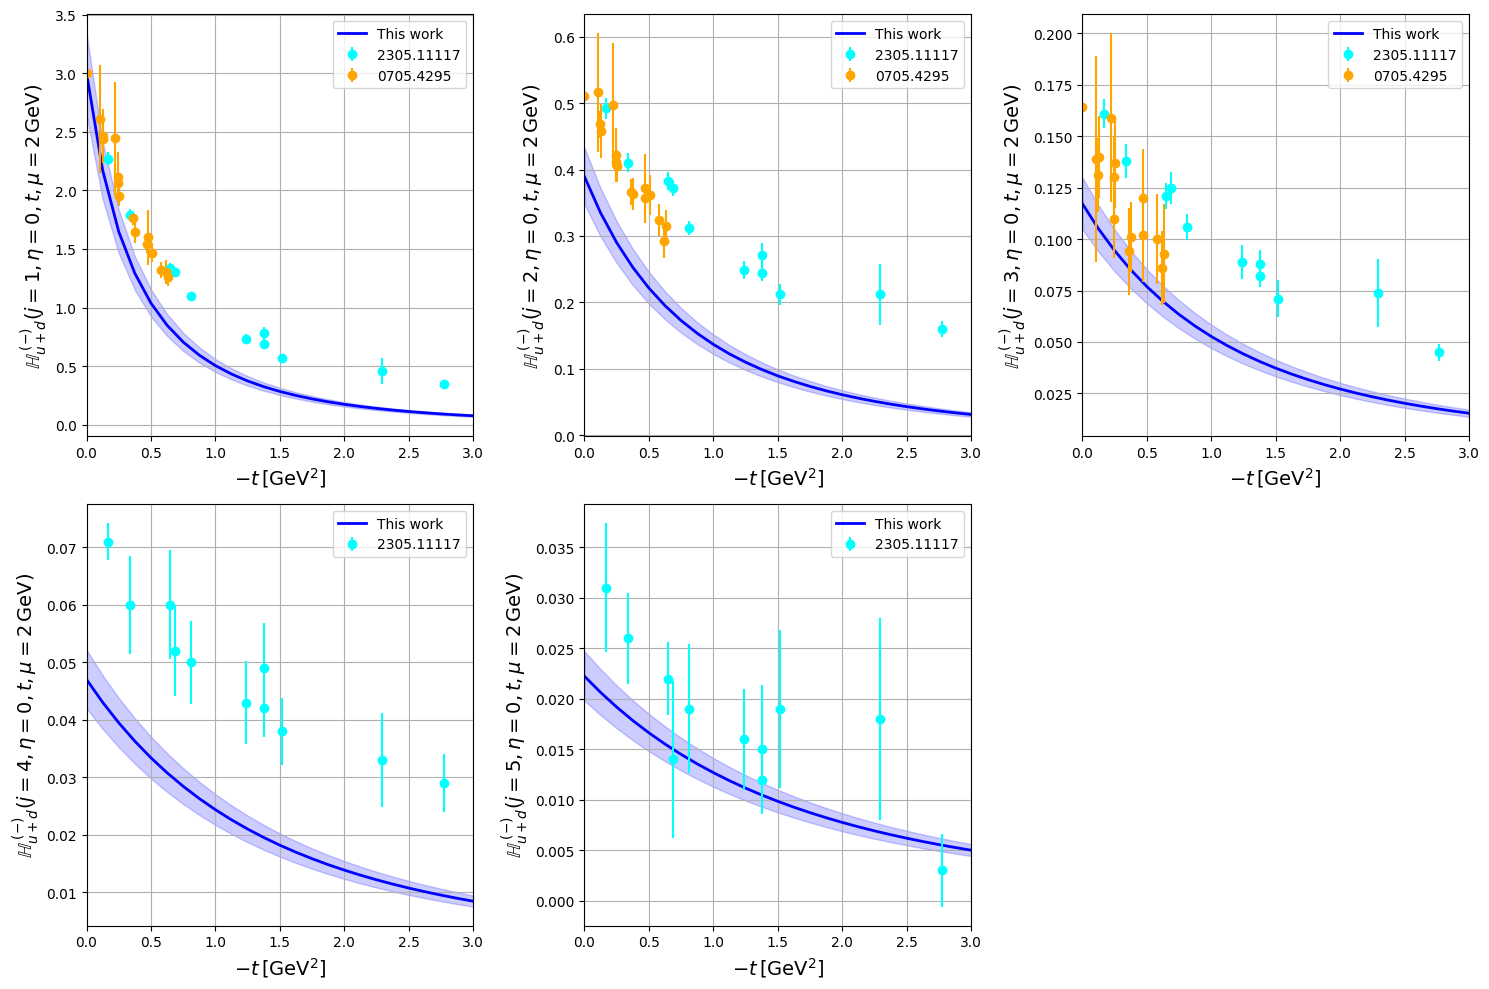

In [2]:
# NonSingletIsoscalar
y_label = "$\\mathbb{{H}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsoscalar"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,"quark",moment_type, moment_label,25)

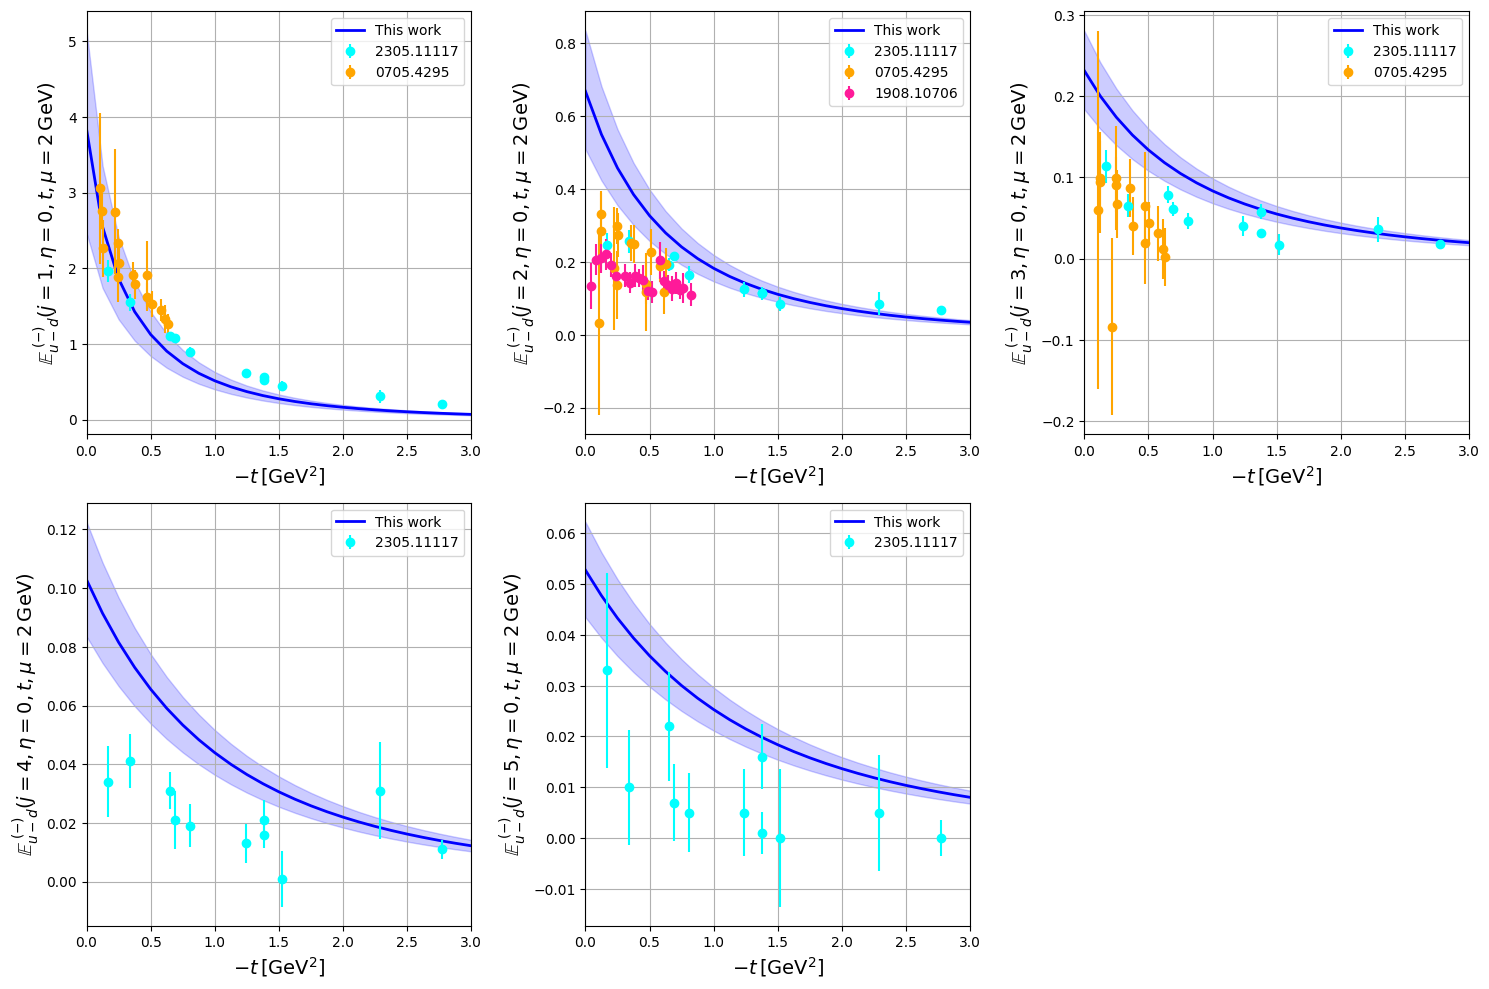

In [2]:
#NonSingletIsovector
y_label = "$\\mathbb{{E}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsovector"
moment_label = "B"

plot_moments_on_grid(0,y_label,3,3,"quark",moment_type, moment_label,25)

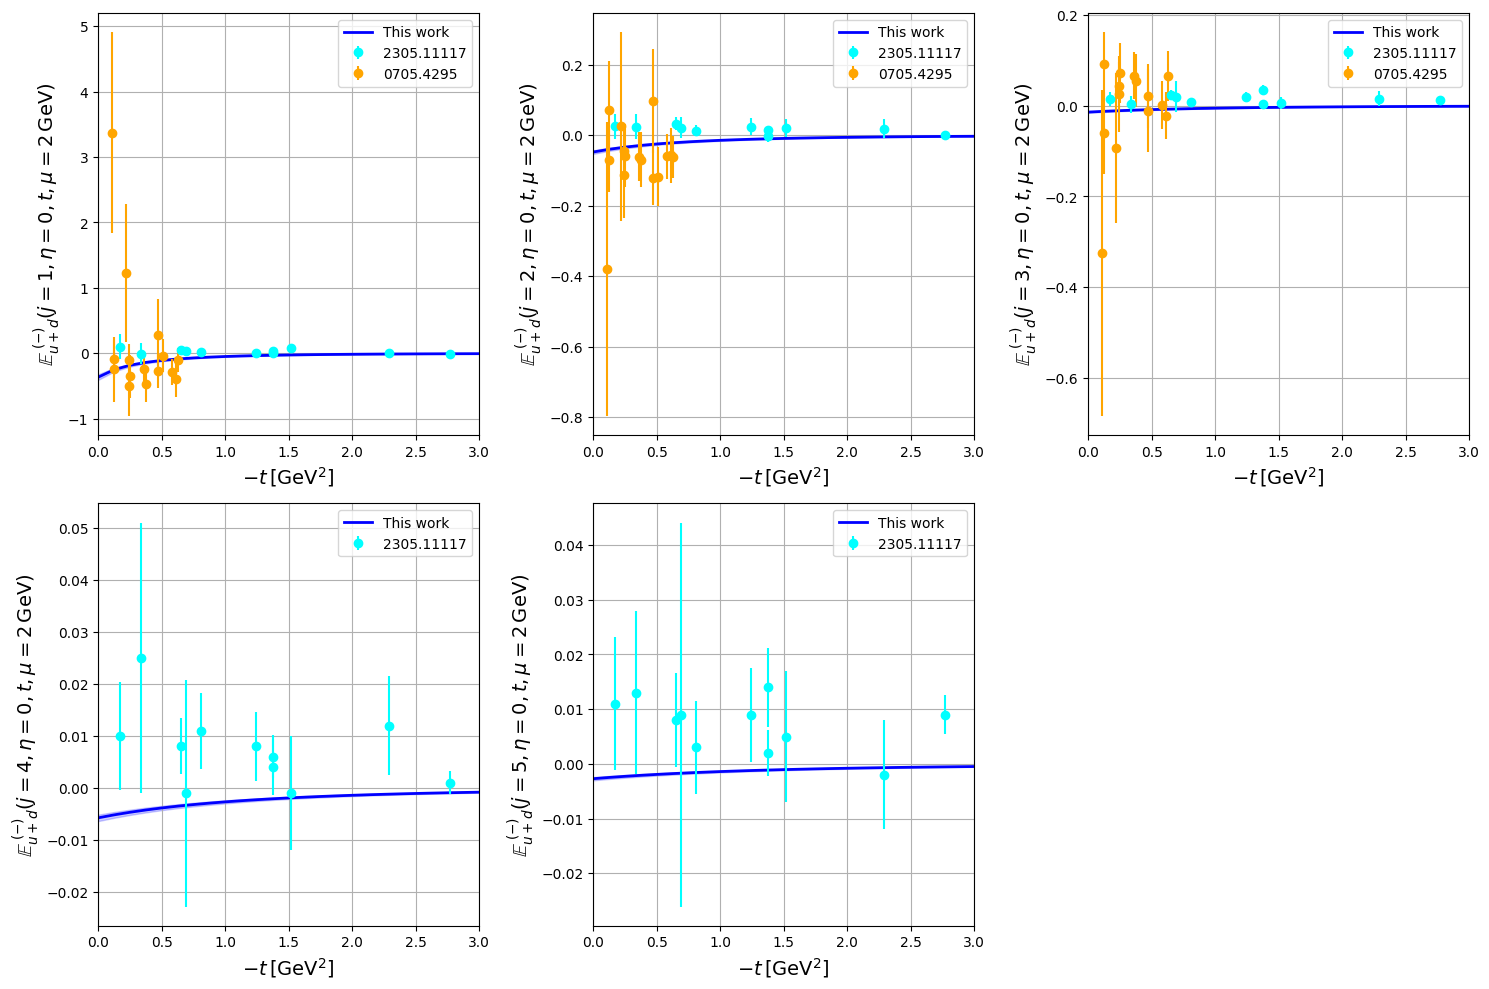

In [3]:
# NonSingletIsoscalar
y_label = "$\\mathbb{{E}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsoscalar"
moment_label = "B"

plot_moments_on_grid(0,y_label,3,3,"quark",moment_type, moment_label,25)

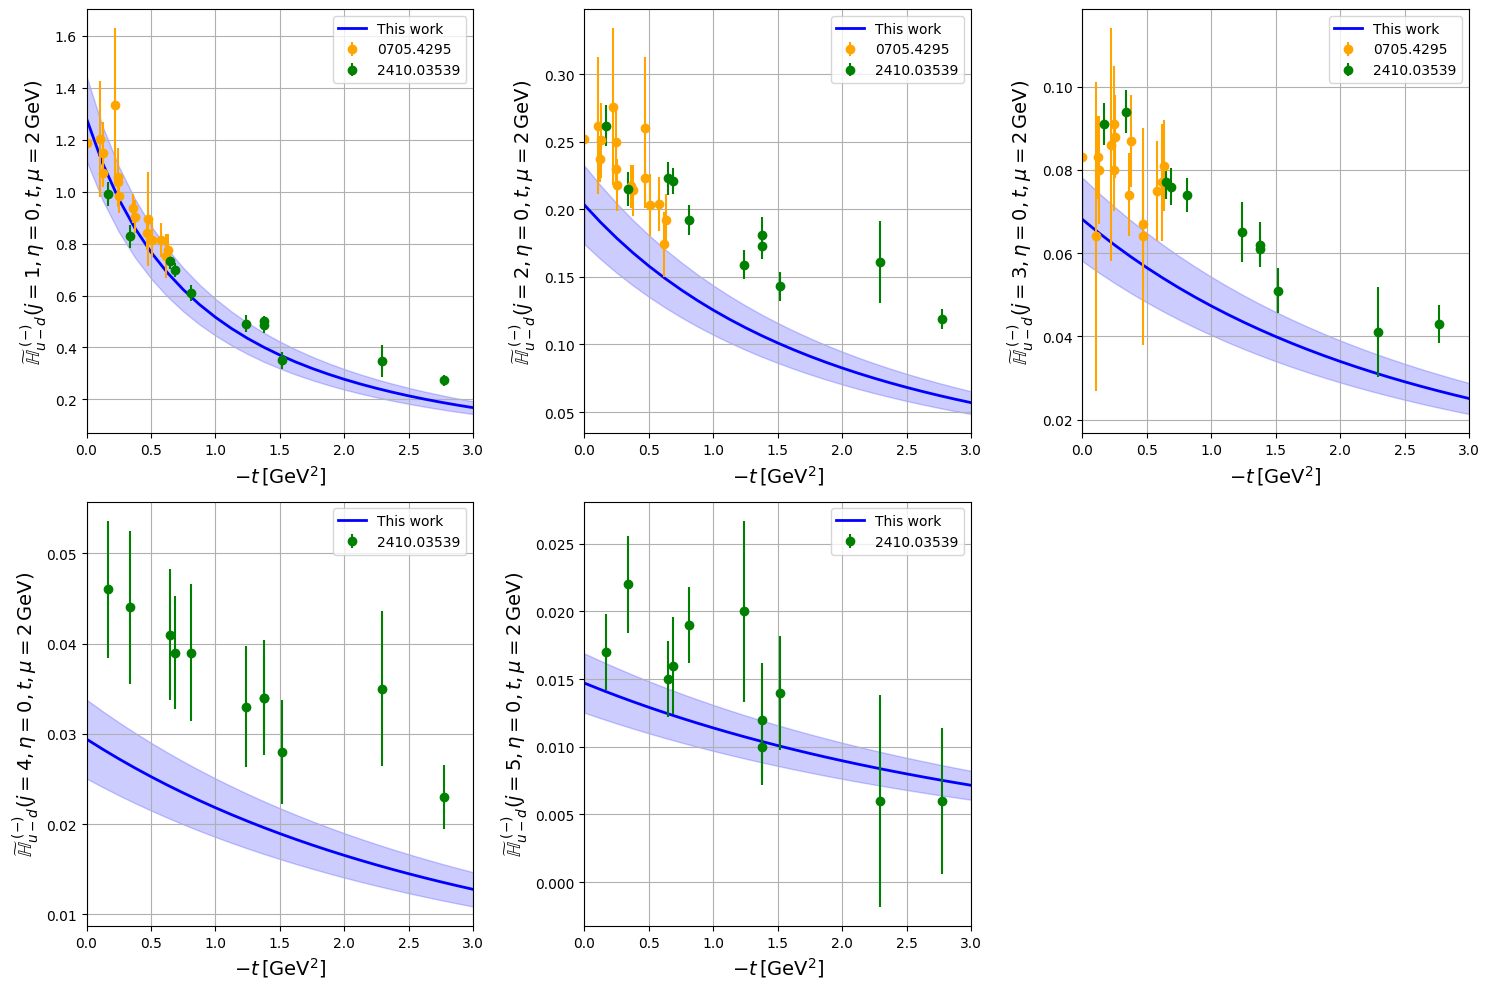

In [2]:
#NonSingletIsovector Axial
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsovector"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,"quark",moment_type, moment_label,25)

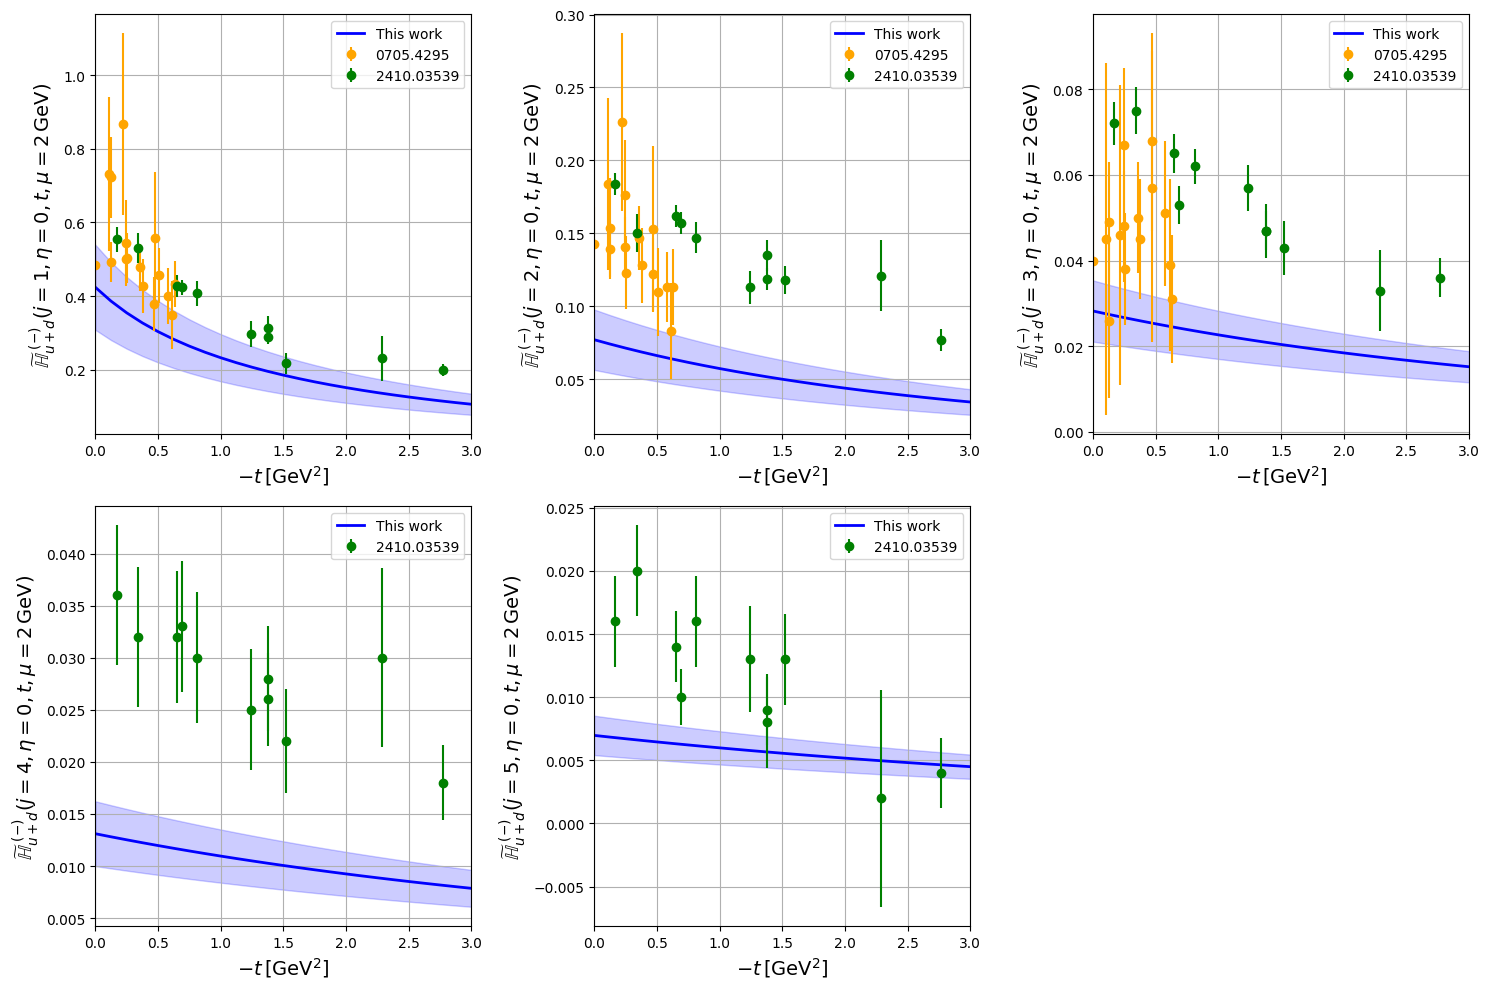

In [3]:
#NonSingletIsoscalar Axial
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsoscalar"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,"quark",moment_type, moment_label,25)

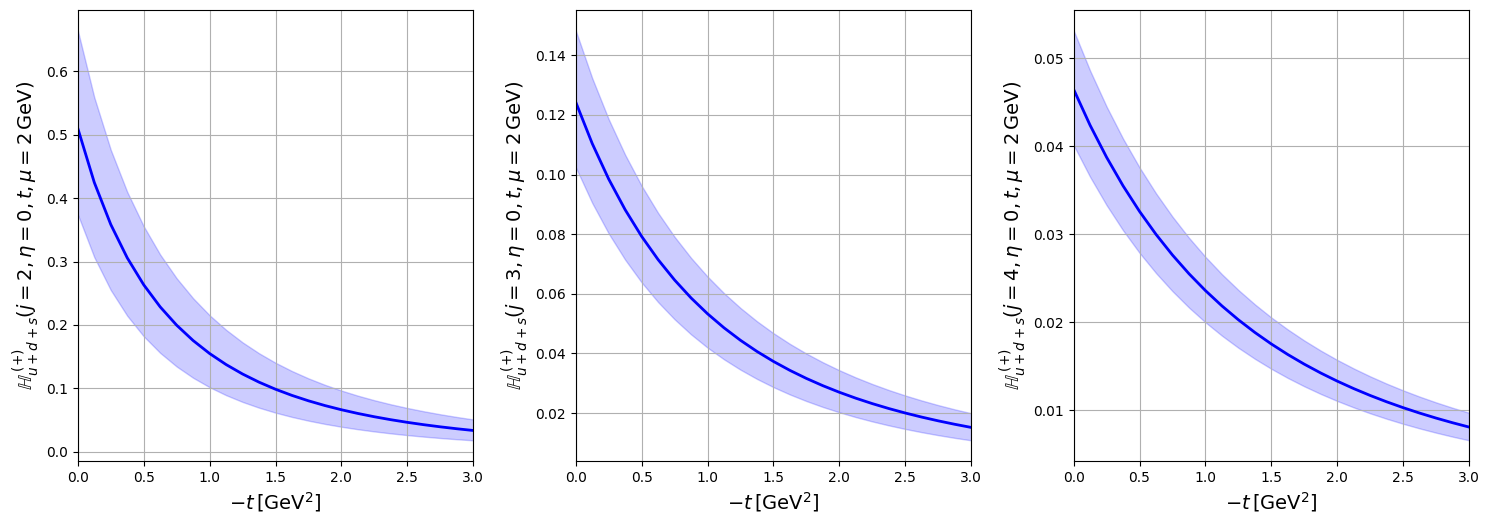

In [19]:
# Sea Quark Singlet
y_label = "$\\mathbb{{H}}_{{u+d+s}}^{{\,\,(+)}}$"
moment_type = "Singlet"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,"quark",moment_type, moment_label,25)

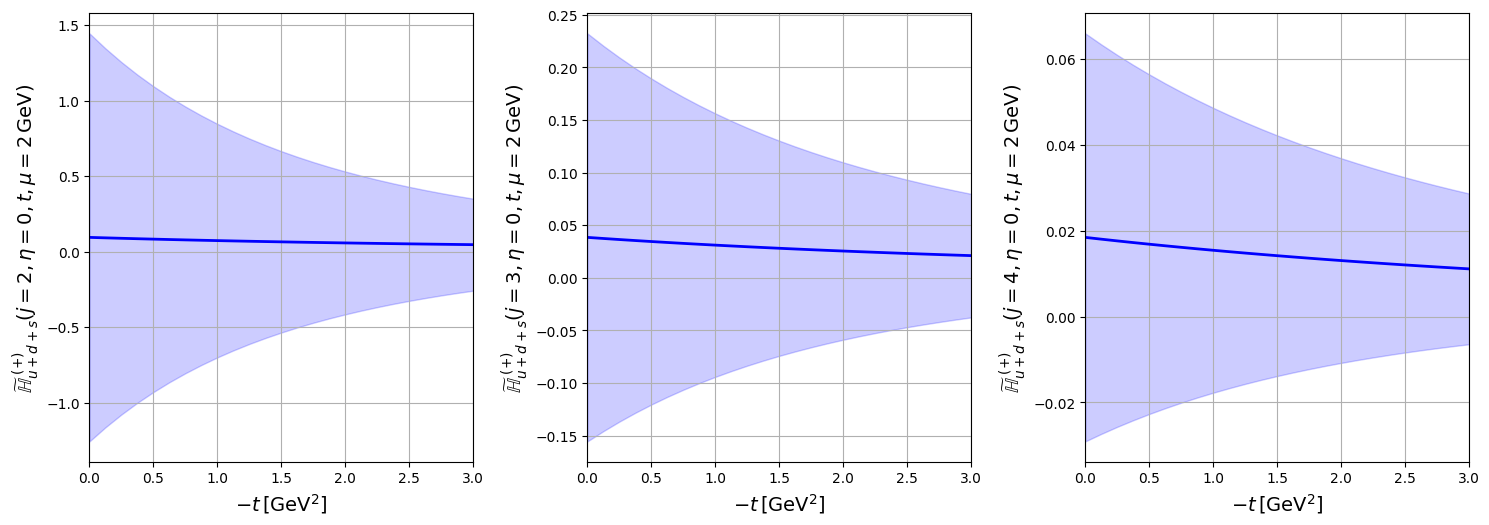

In [3]:
# Sea Quark Singlet
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u+d+s}}^{{\,\,(+)}}$"
moment_type = "Singlet"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,"quark",moment_type, moment_label,25)

In [2]:
# 0.510024649589122
# -1.30044714988575
# 0.50111263175031
# -2.57000756593034
print(evolve_conformal_moment(2,0,-1e-4,2,3,"quark","Singlet","A","central"))
print(evolve_singlet_D(2,1,-1e-4,2,3,"quark","A","central"))
print(evolve_conformal_moment(2,0,-1e-4,2,3,"gluon","Singlet","A","central"))
print(evolve_singlet_D(2,1,-1e-4,2,3,"gluon","A","central"))

0.5100029654252884
-1.29999956564934
0.501008173861975
-2.56999962157614


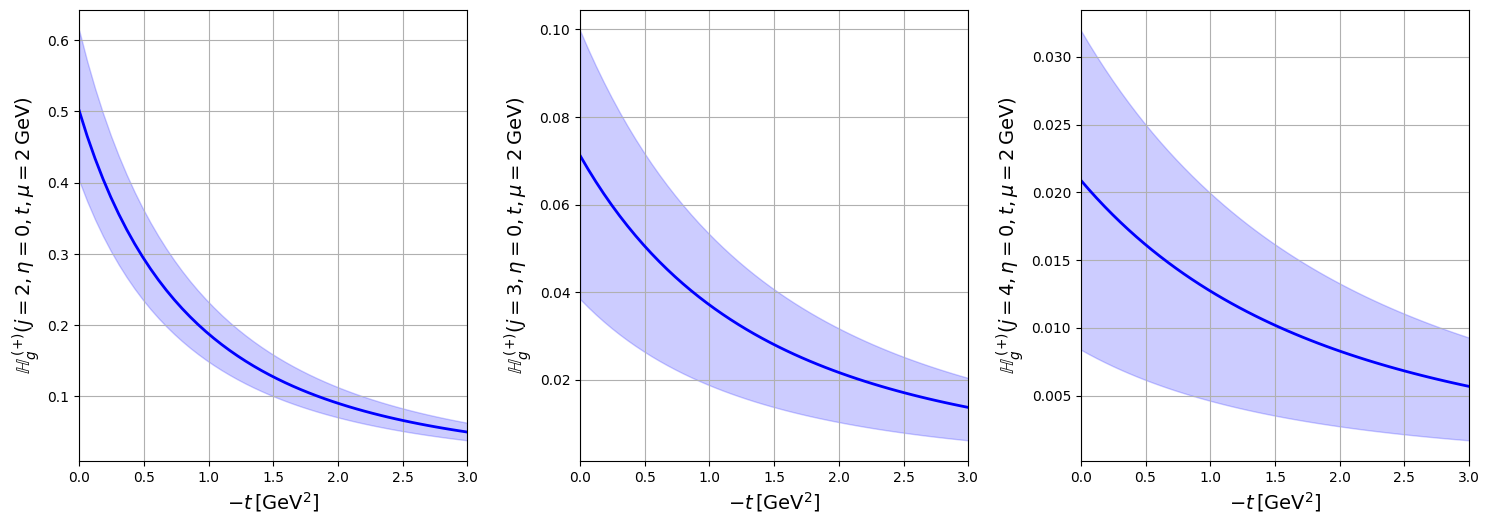

In [24]:
y_label = "$\\mathbb{{H}}_{{g}}^{{\,\,(+)}}$"
particle = "gluon"
moment_type = "Singlet"
moment_label = "A"
plot_moments_on_grid(0,y_label,3,3,particle,moment_type,moment_label)

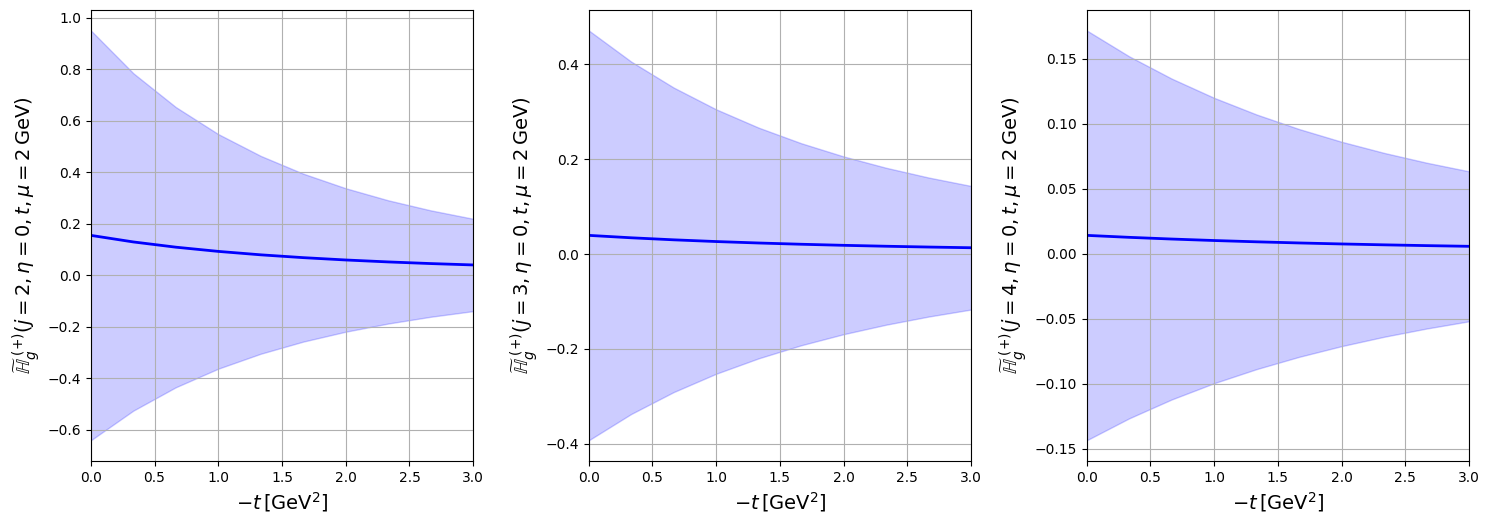

In [4]:
# Gluon Singlet
y_label = "$\\widetilde{\\mathbb{{H}}}_{{g}}^{{\,\,(+)}}$"
moment_type = "Singlet"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,"gluon",moment_type, moment_label,10)

Plots of GPDs through Mellin-Barnes Integral

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.041840 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.040154 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.027742 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/GPD/NonSingletIsoscalarquarkGPD_E.pdf


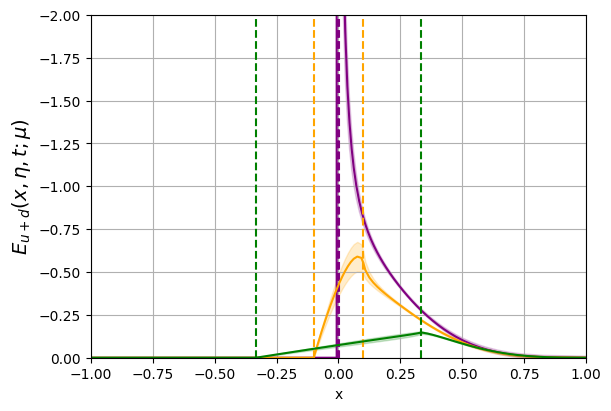

In [ ]:
plot_gpds(particle="quark",gpd_type="NonSingletIsoscalar",gpd_label="E",read_from_file=True, write_to_file=False,y_0=0,y_1=-2,plot_legend=False)

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.049581 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.038945 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.030953 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/GPD/NonSingletIsovectorquarkGPD_E.pdf


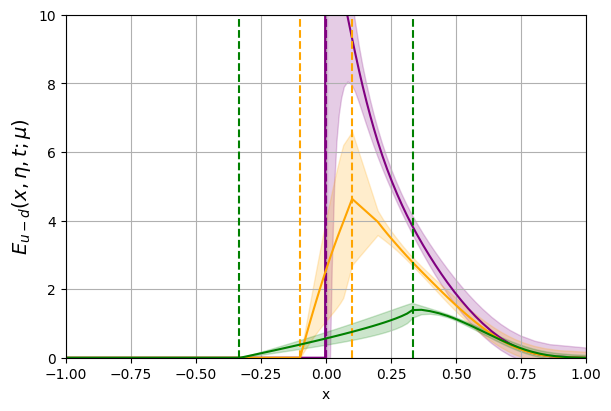

In [ ]:
plot_gpds(particle="quark",gpd_type="NonSingletIsovector",gpd_label="E",read_from_file=True, write_to_file=False,y_0=0,y_1=10)

/home/hechenvanmountain/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Time for plot computation for parameters (eta,t) = ((0.0, -0.69)): 0.037388 seconds
Time for plot computation for parameters (eta,t) = ((0.33, -0.69)): 0.026723 seconds
Time for plot computation for parameters (eta,t) = ((0.1, -0.23)): 0.027040 seconds


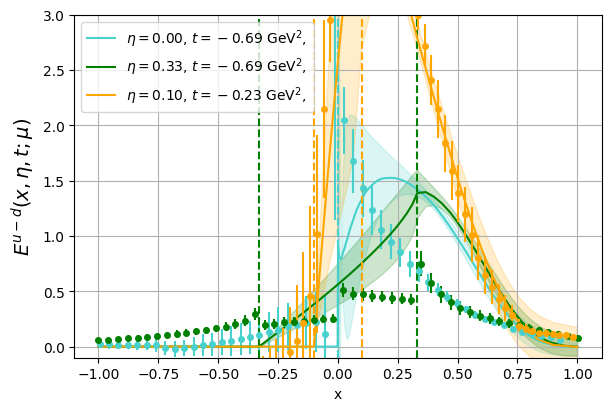

In [ ]:
plot_gpd_data(particle="quark",gpd_type="NonSingletIsovector",gpd_label="E",read_from_file=True,write_to_file=False,plot_legend=True)

/home/hechenvanmountain/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Time for plot computation for parameters (eta,t) = ((0.0, -0.69)): 0.031749 seconds
Time for plot computation for parameters (eta,t) = ((0.33, -0.69)): 0.033551 seconds
Time for plot computation for parameters (eta,t) = ((0.0, -0.39)): 0.033198 seconds


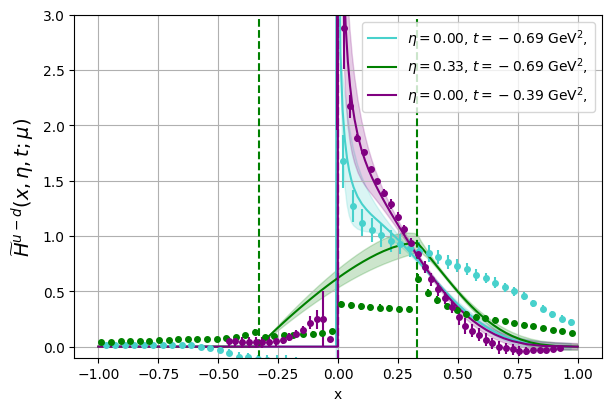

In [ ]:
plot_gpd_data(particle="quark",gpd_type="NonSingletIsovector",gpd_label="Htilde",read_from_file=True,write_to_file=False,plot_legend=True)